In [1]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import numpy as np
import os
import sys

In [2]:
# get current working dir
current_dir = os.getcwd()
print(current_dir)
# append the utils direct (if you change the appended path, you must restart the kernel!)
sys.path.append(current_dir + "/..")
# import custom package (make sure the utils is added to the path)
import utils as ul

/home/longhao/source/data_review/src/data_display


In [3]:
# define names of the bag to be displayed
bagfilename = "payload_retraction_0808_trial1"

# select and save topics to a dictionary
# ******************* IMPORTANT ************************
# csvNameList contains entries of topics, for example
# ("encoder-position_payload.csv", True, "encoder_payload") means saving topic "encoder-position_payload"
# to encoder_payload.
# the 2nd parameter is True, means that we have saved 'header.stamp.secs' and 'header.stamp.nsecs' correctly with Rostime
# if not, set it to False, the function will use 'Time' as the time reference.
# Beware that 'Time' is not accurate. It is always better to use 'header.stamp.secs' and 'header.stamp.nsecs' to 
# record time.
csvNameList = [("encoder-position_payload.csv", True, "encoder_payload"),
               ("encoder-velocity_payload.csv", False, "encoder_payload_velocity"),
               ("mocap-pld.csv", True, "payload"),
               ("mocap-T15.csv", True, "T15")]

# specify bag location
dir = current_dir  + "/../../data/cable_test/" + bagfilename + "/"
print("csv dir is: " + dir)

csv dir is: /home/longhao/source/data_review/src/data_display/../../data/cable_test/payload_retraction_0808_trial1/


In [4]:
# specify a start time and end time for the bag read
startT = 12
endT = 40
# this will auto read and parse the .csv files
test_data_0 = dict()
for filename in csvNameList:
    test_data_0[filename[2]] = ul.ProcessRosbagDataFromCSVWithBaseTime(dir + filename[0], startT, endT, headerTimeStamp=filename[1])

In [5]:
def GetPayloadGroundTruth(t15Position, payloadMeasurement, offset):
    payload_ground_truth = list()
    for i, x in enumerate(t15Position,):
        payload_ground_truth.append(x - payloadMeasurement[i] - offset)
    return payload_ground_truth

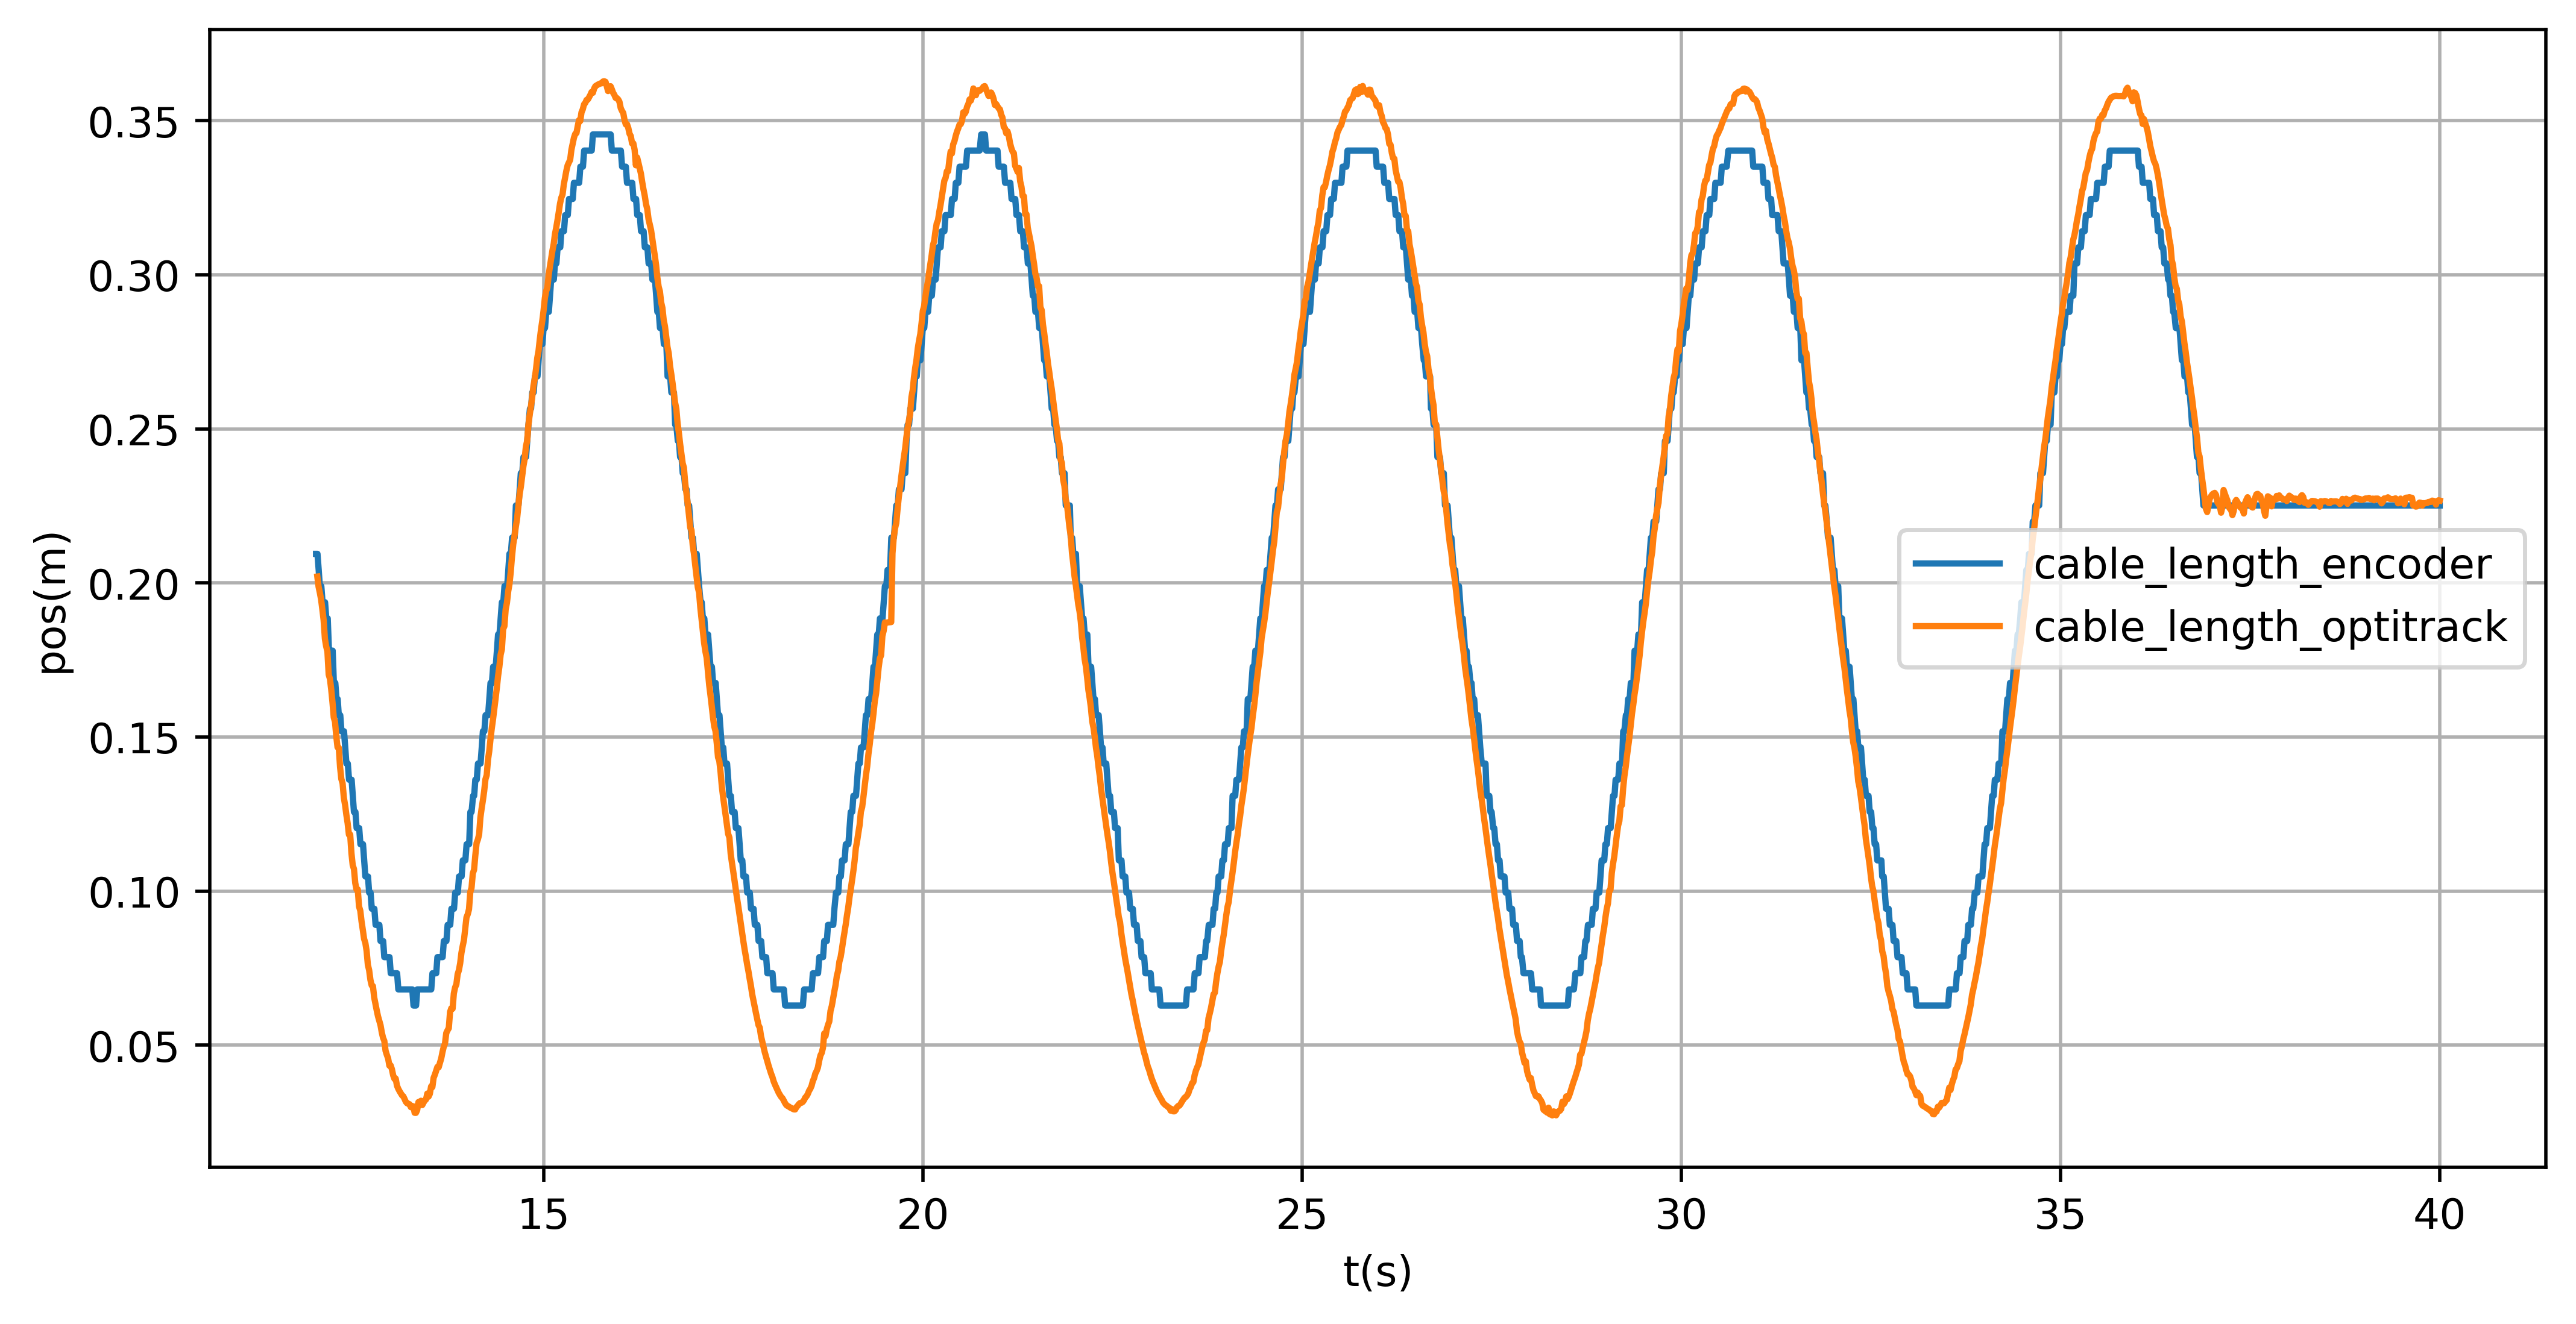

In [6]:
offset = 0.19
payload_ground_truth_0 = GetPayloadGroundTruth(test_data_0["T15"]['pose.position.z'], test_data_0["payload"]['pose.position.z'], offset=offset)
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(test_data_0["encoder_payload"]["processed_time"], test_data_0["encoder_payload"]['vector.z'])
plt.plot(test_data_0["payload"]["processed_time"], payload_ground_truth_0)
plt.legend(['cable_length_encoder', 'cable_length_optitrack']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

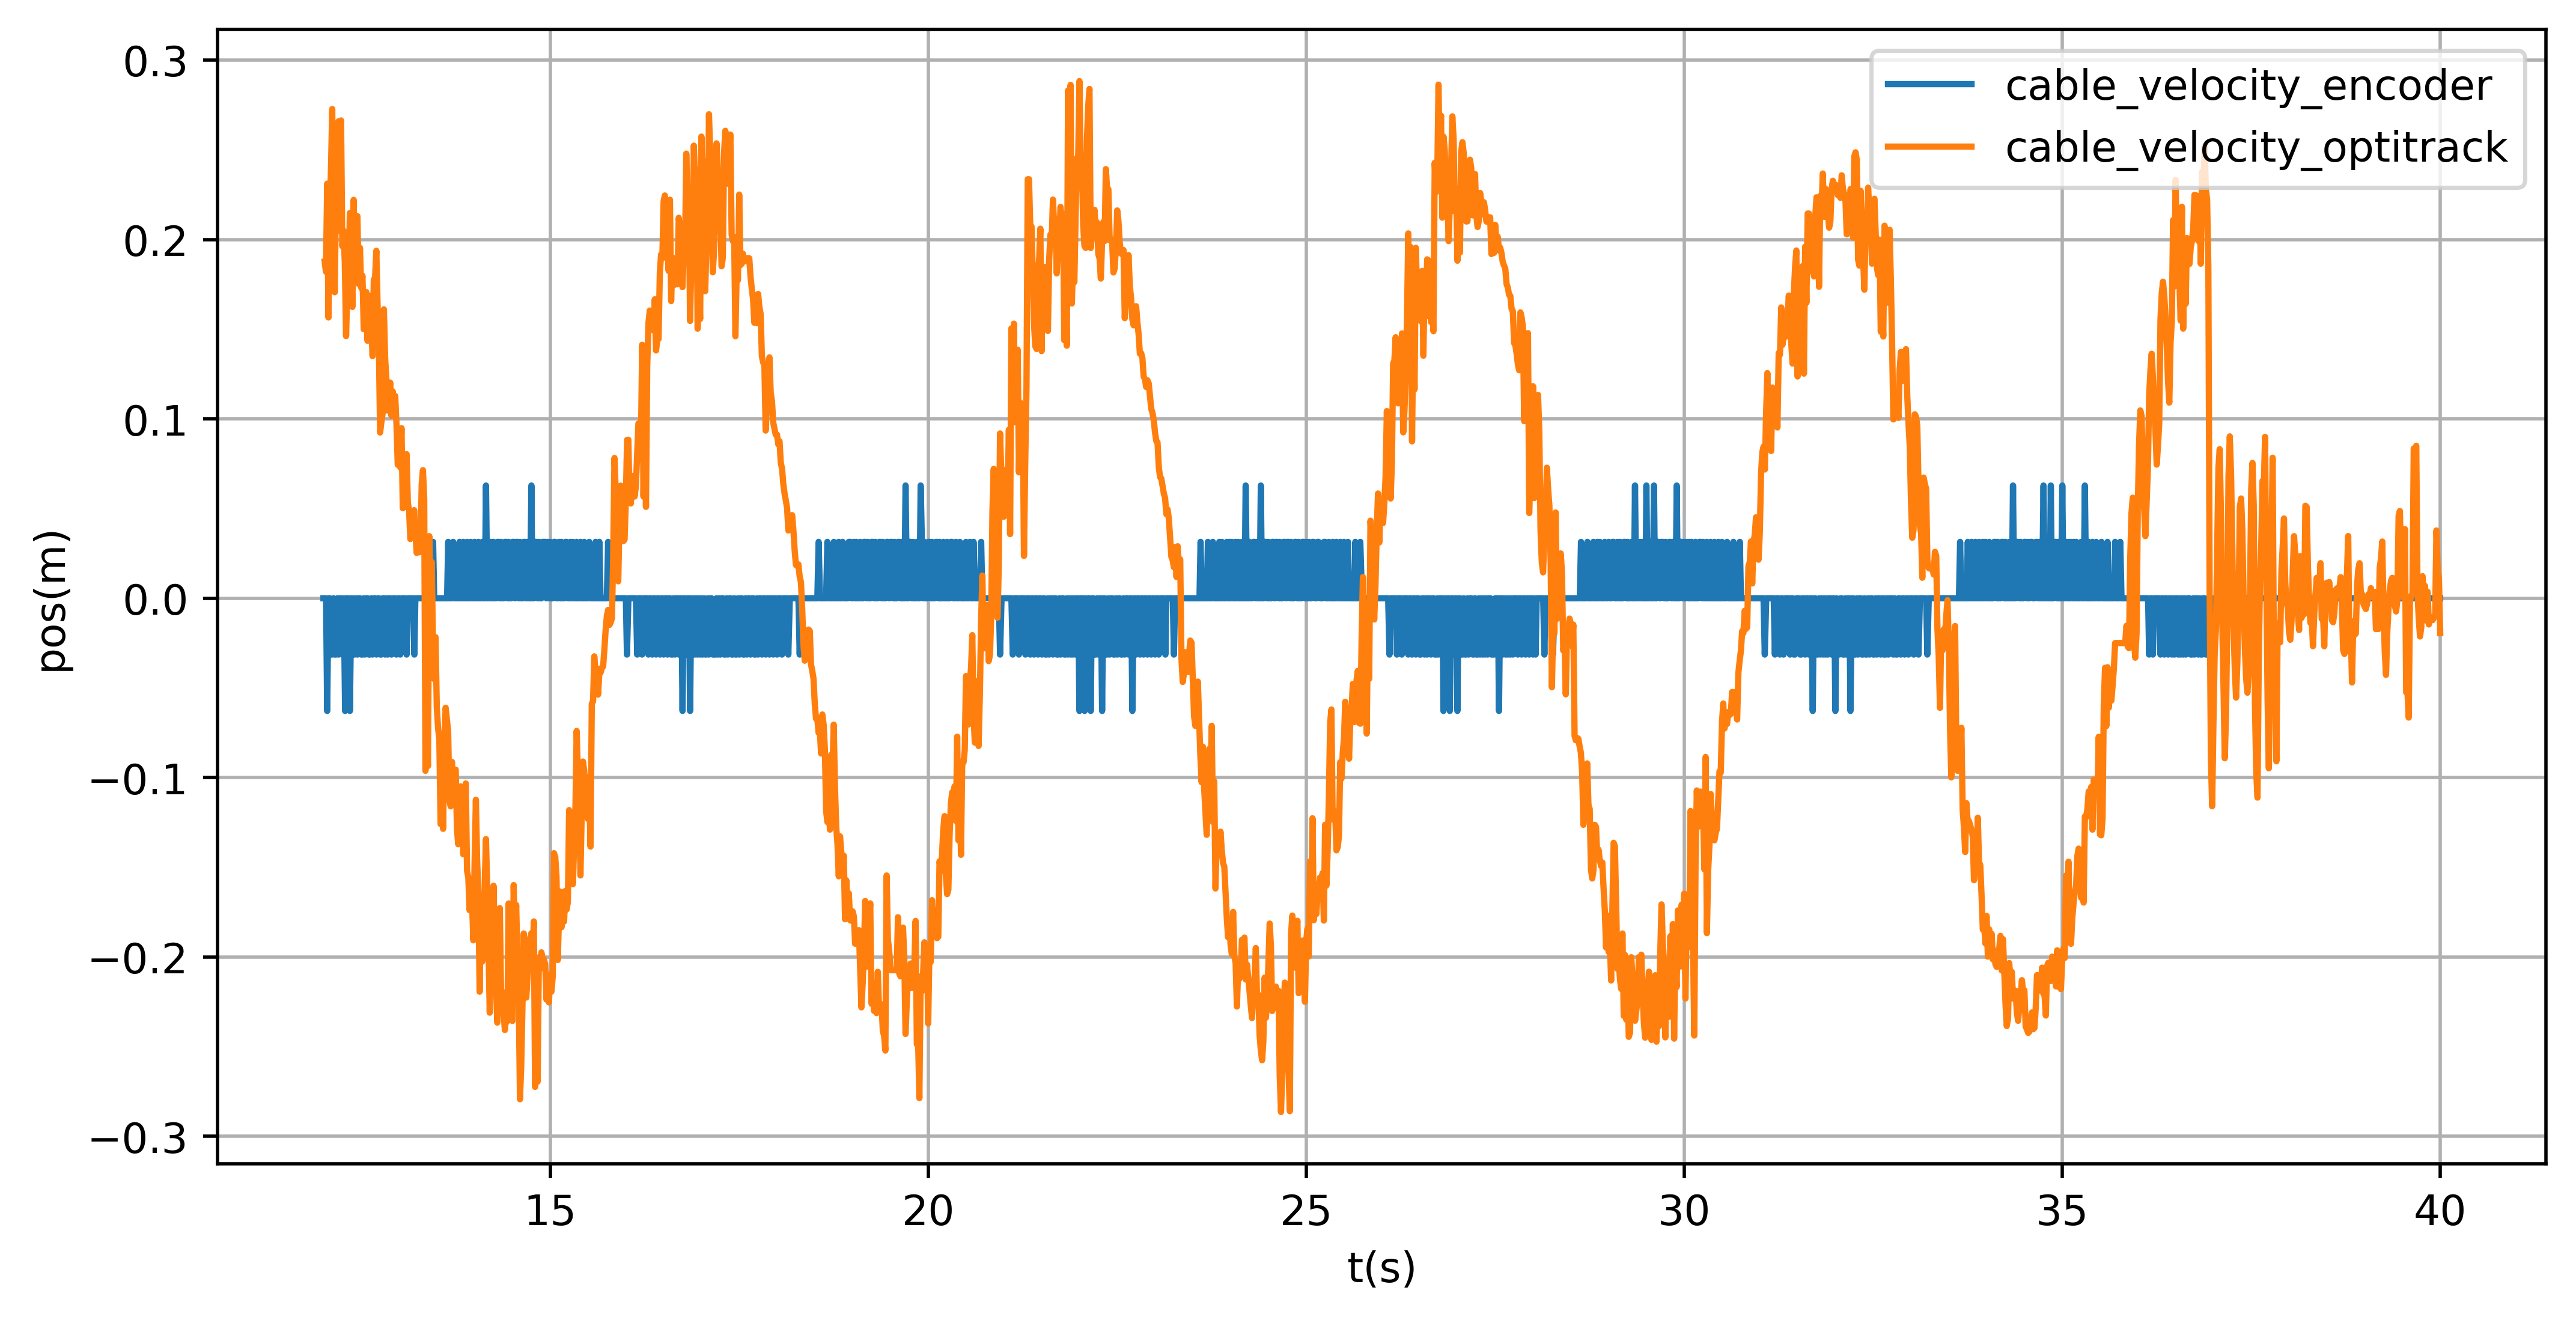

In [7]:
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(test_data_0["encoder_payload_velocity"]["processed_time"], test_data_0["encoder_payload_velocity"]['vector.z'])
plt.plot(test_data_0["payload"]["processed_time"], test_data_0["payload"]['twist.linear.z'])
plt.legend(['cable_velocity_encoder', 'cable_velocity_optitrack']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

In [8]:
# specify a start time and end time for the bag read
startT = 60
endT = 150
# this will auto read and parse the .csv files
test_data_1 = dict()
for filename in csvNameList:
    test_data_1[filename[2]] = ul.ProcessRosbagDataFromCSVWithBaseTime(dir + filename[0], startT, endT, headerTimeStamp=filename[1])

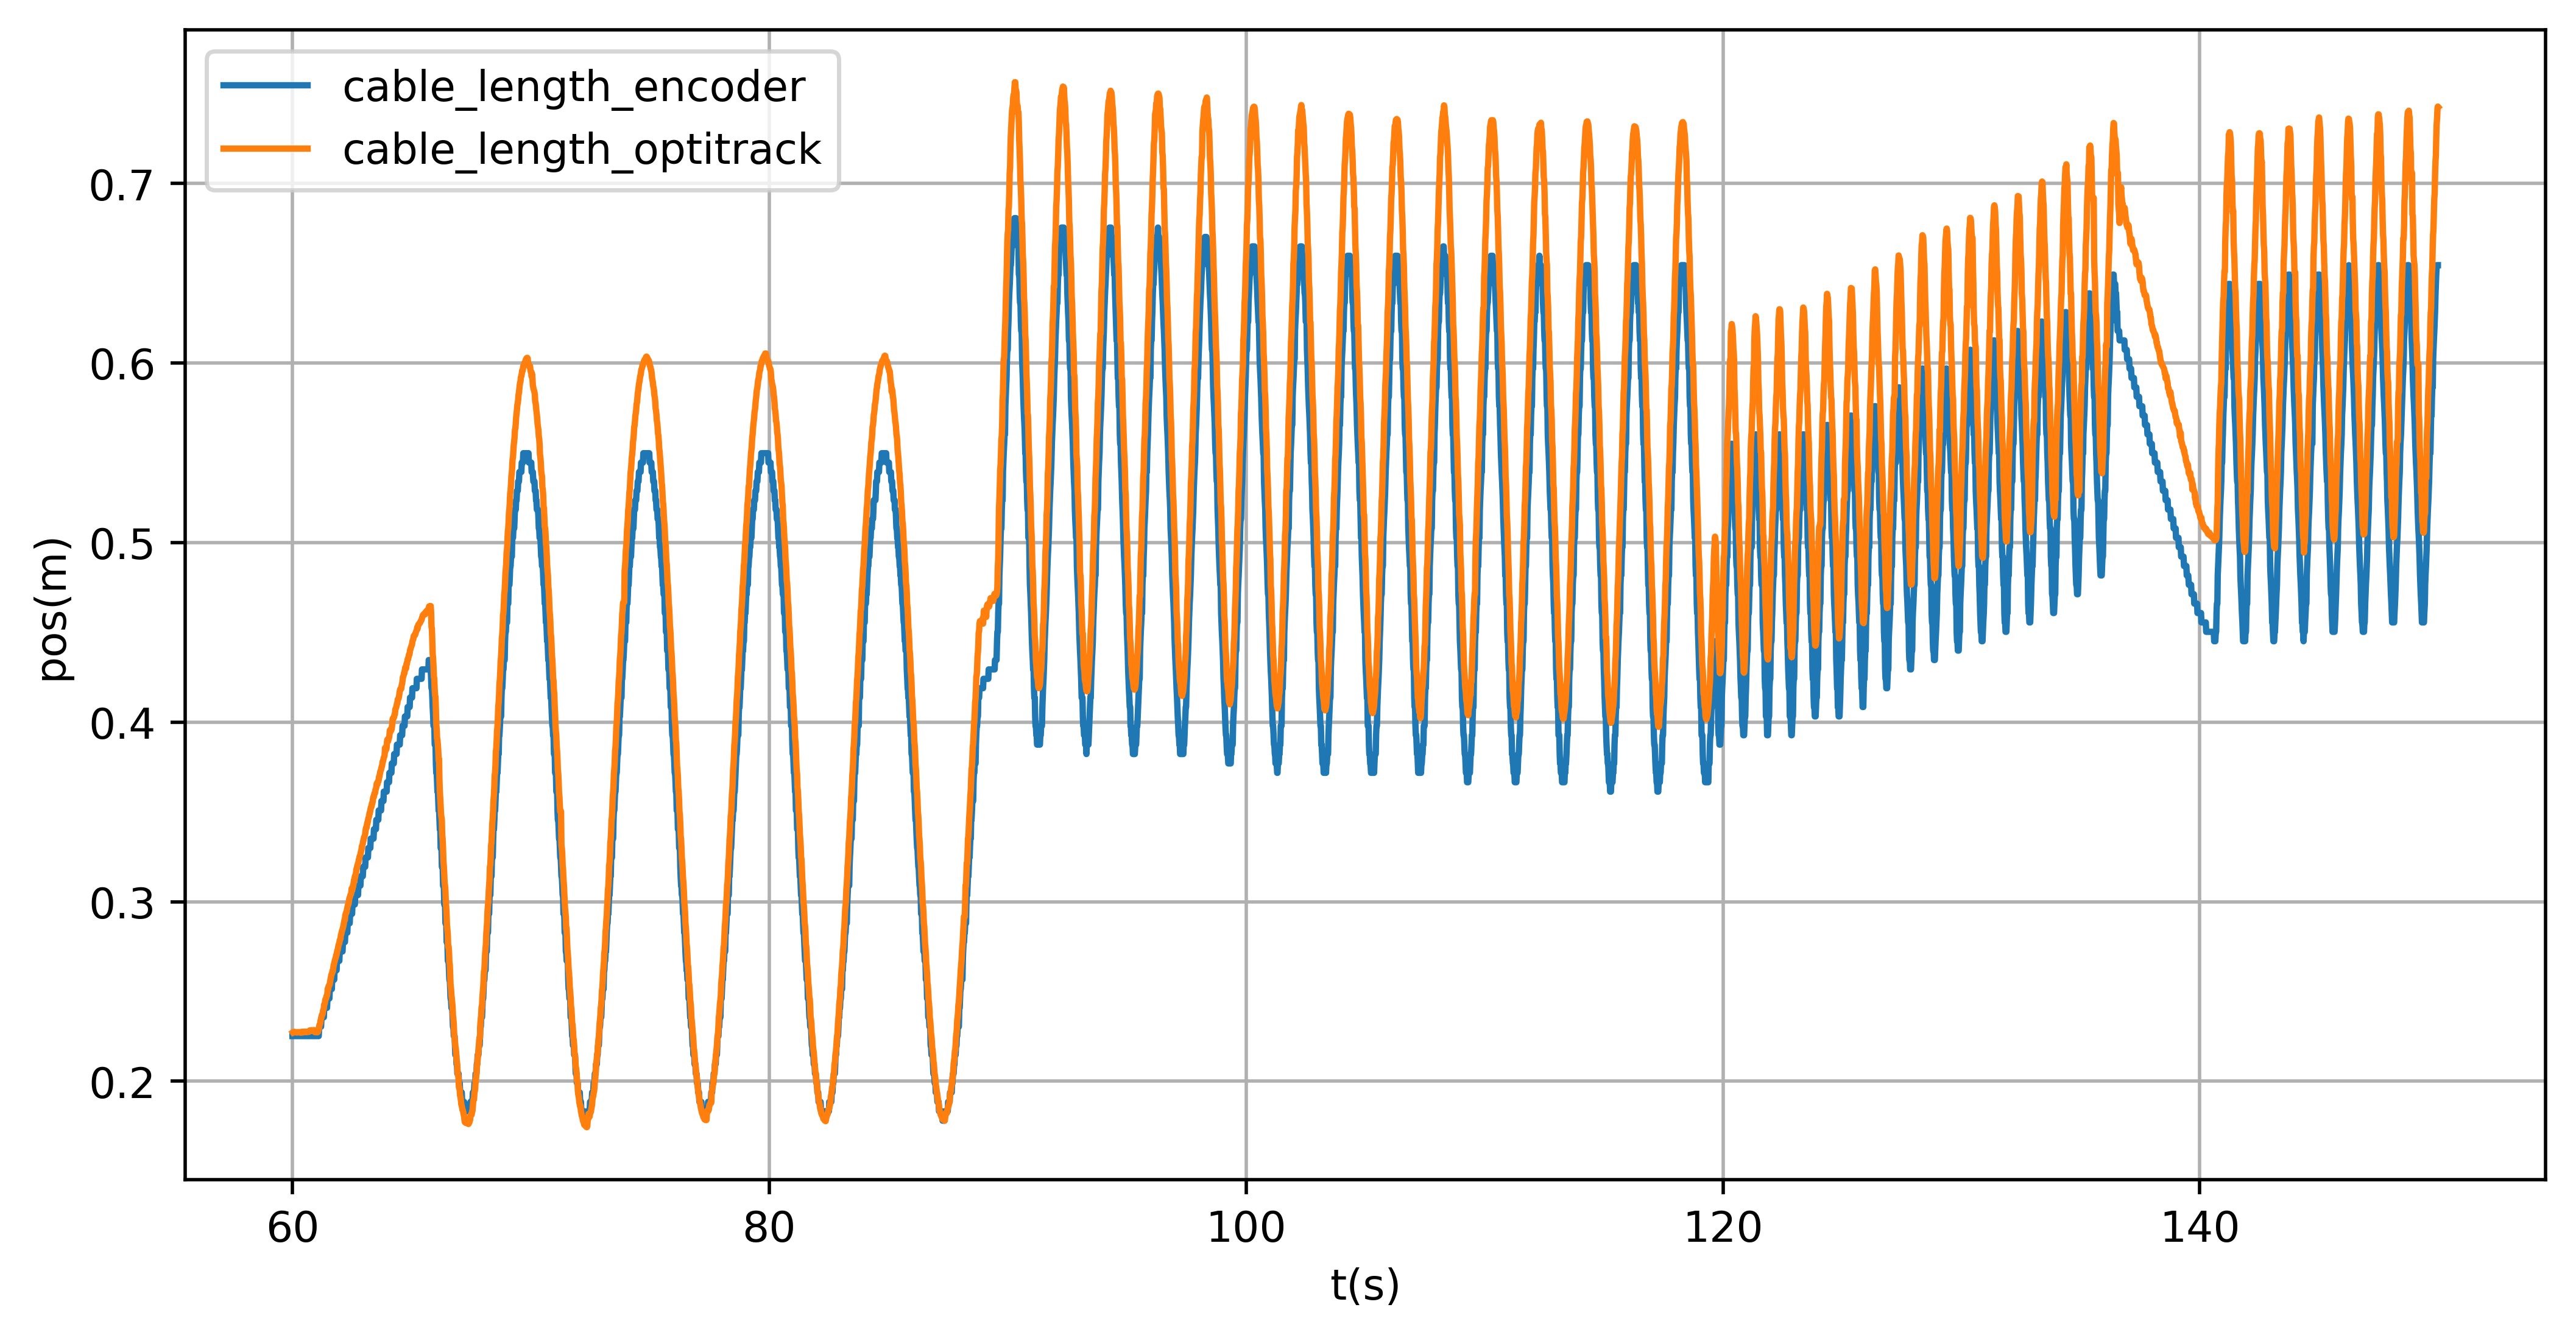

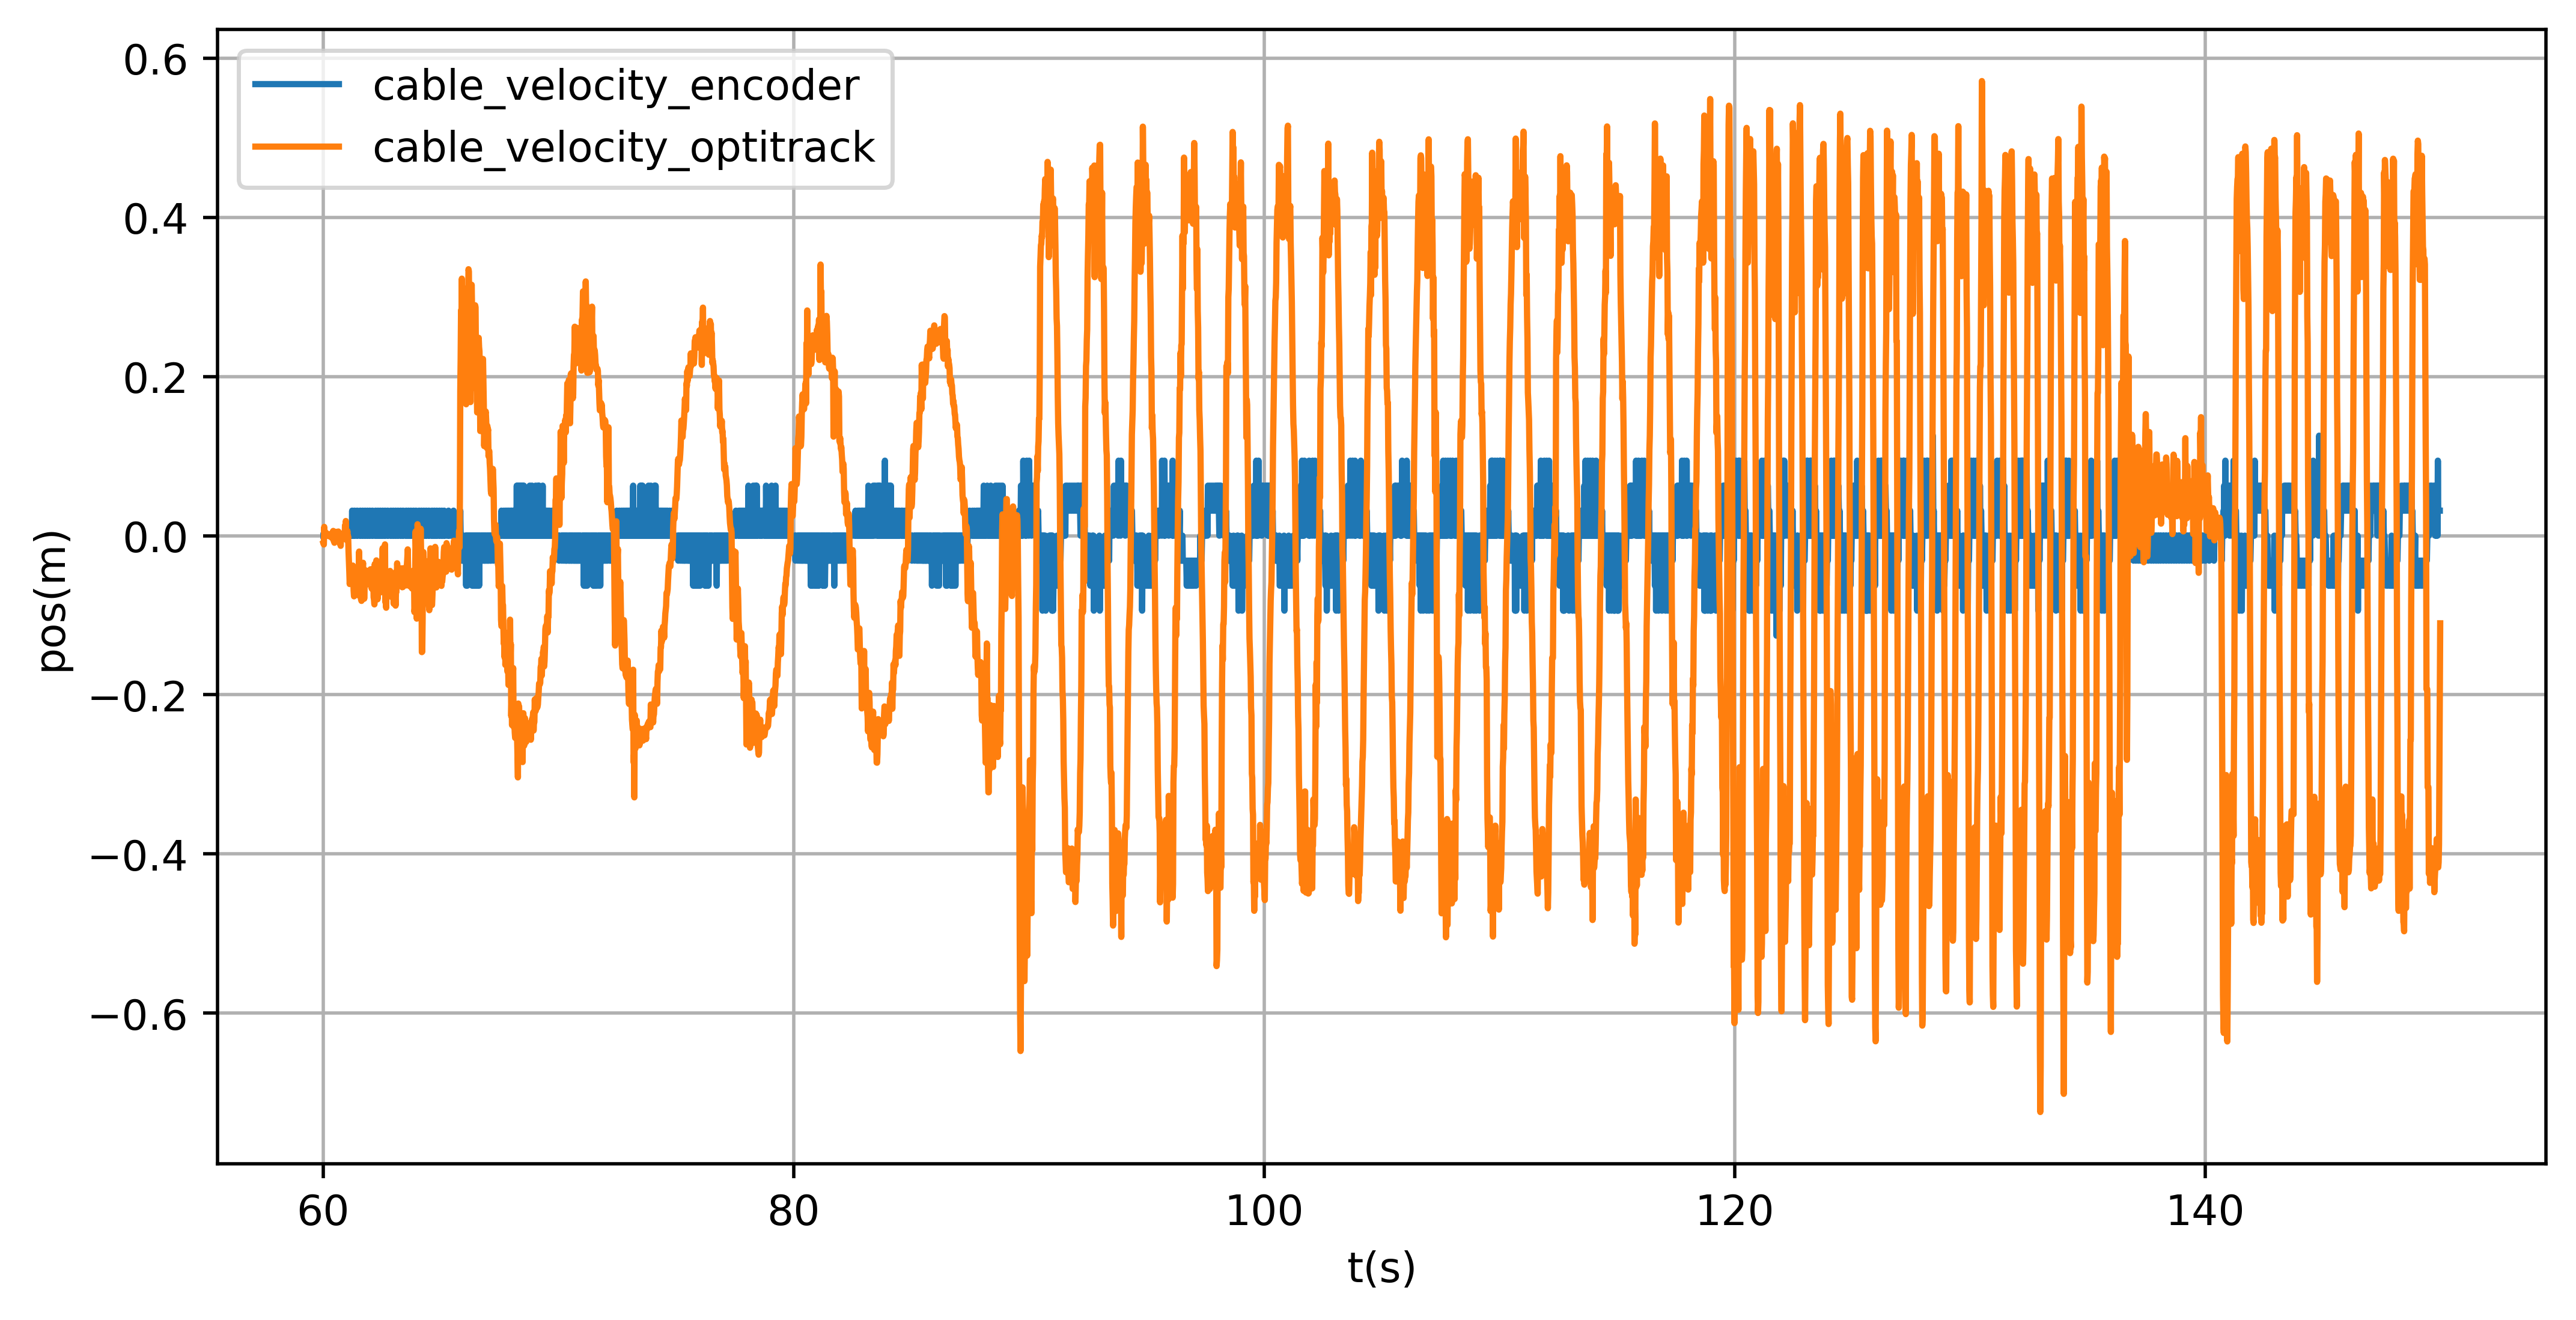

In [9]:
offset = 0.19
payload_ground_truth_1 = GetPayloadGroundTruth(test_data_1["T15"]['pose.position.z'], test_data_1["payload"]['pose.position.z'], offset=offset)
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(test_data_1["encoder_payload"]["processed_time"], test_data_1["encoder_payload"]['vector.z'])
plt.plot(test_data_1["payload"]["processed_time"], payload_ground_truth_1)
plt.legend(['cable_length_encoder', 'cable_length_optitrack']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

plt.figure(figsize=(10,5), dpi= 500)
plt.plot(test_data_1["encoder_payload_velocity"]["processed_time"], test_data_1["encoder_payload_velocity"]['vector.z'])
plt.plot(test_data_1["payload"]["processed_time"], test_data_1["payload"]['twist.linear.z'])
plt.legend(['cable_velocity_encoder', 'cable_velocity_optitrack']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)